In [5]:
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
try:
    zip_path = "c:\\Users\\ANANDITO\\Documents\\KULIAH\\Telkom University\\Semester 6\\BANGKIT\\machine-learning-kaisar\\grade_prediction\\dataset\\food_facts_clean.zip"
    with zipfile.ZipFile(zip_path, 'r') as z:
        print(z.namelist())
    
        with z.open('food_facts_clean.csv') as f:
            df = pd.read_csv(f, on_bad_lines='skip', sep='\t')

except FileNotFoundError as e:
    print("File not found. Please check the path.")
    print(e)
except Exception as e:
    print("An error occurred.")
    print(e)

['food_facts_clean.csv']


C:\Users\ANANDITO\AppData\Local\Temp\ipykernel_5240\236274930.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, on_bad_lines='skip', sep='\t')


In [7]:
print(df.head())
print(df.info())

            code                                          states_en  \
0  3760029248001  To be checked,Complete,Nutrition facts complet...   
1  3029330062806  To be completed,Nutrition facts completed,Ingr...   
2  3257980112590  To be completed,Nutrition facts completed,Ingr...   
3  3017760038409  To be completed,Nutrition facts completed,Ingr...   
4  3160181210524  To be checked,Complete,Nutrition facts complet...   

                                                 url     created_datetime  \
0  http://world-en.openfoodfacts.org/product/3760...  2012-01-31 14:43:58   
1  http://world-en.openfoodfacts.org/product/3029...  2012-02-09 10:34:56   
2  http://world-en.openfoodfacts.org/product/3257...  2012-02-11 14:51:07   
3  http://world-en.openfoodfacts.org/product/3017...  2012-02-11 15:07:23   
4  http://world-en.openfoodfacts.org/product/3160...  2012-02-11 18:51:58   

  last_modified_datetime   creator       pnns_groups_2  \
0    2018-08-30 21:14:54  stephane              swee

In [8]:
df_ad = df.drop(columns=['code', 'states_en', 'url', 'created_datetime', 'last_modified_datetime', 'creator', 'pnns_groups_2', 'countries_en', 'pnns_groups_1', 'product_name', 'categories_en', 'main_category_en', 'nutriscore_score'])

In [9]:
print(df_ad.head())
print(df_ad.info())

   energy_100g  proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  \
0       1717.0            3.0      10.9                73.5         49.3   
1       1898.0            8.5      15.5                68.0          2.0   
2       1615.0            6.9       3.2                80.4         51.8   
3       1487.0            3.8       2.0                78.0         58.0   
4       2040.0            7.0      25.0                56.0         33.0   

   salt_100g  sodium_100g  saturated-fat_100g nutriscore_grade  fiber_100g  \
0     1.7000      0.68000                 7.0                e         1.0   
1     1.7526      0.70104                 1.3                c         3.0   
2     0.0900      0.03600                 1.2                d         1.6   
3     0.0900      0.03600                 0.6                d         1.7   
4     0.3810      0.15240                14.0                e         5.5   

   fruits-vegetables-rate_100g  
0                           25  
1       

In [13]:
print(df_ad.isnull().sum())

energy_100g                         0
proteins_100g                       0
fat_100g                            0
carbohydrates_100g                  0
sugars_100g                         0
salt_100g                           0
sodium_100g                         0
saturated-fat_100g                  0
nutriscore_grade               556150
fiber_100g                          0
fruits-vegetables-rate_100g         0
dtype: int64


In [14]:
df_clean = df_ad.dropna()
print(df_clean.isnull().sum())

energy_100g                    0
proteins_100g                  0
fat_100g                       0
carbohydrates_100g             0
sugars_100g                    0
salt_100g                      0
sodium_100g                    0
saturated-fat_100g             0
nutriscore_grade               0
fiber_100g                     0
fruits-vegetables-rate_100g    0
dtype: int64


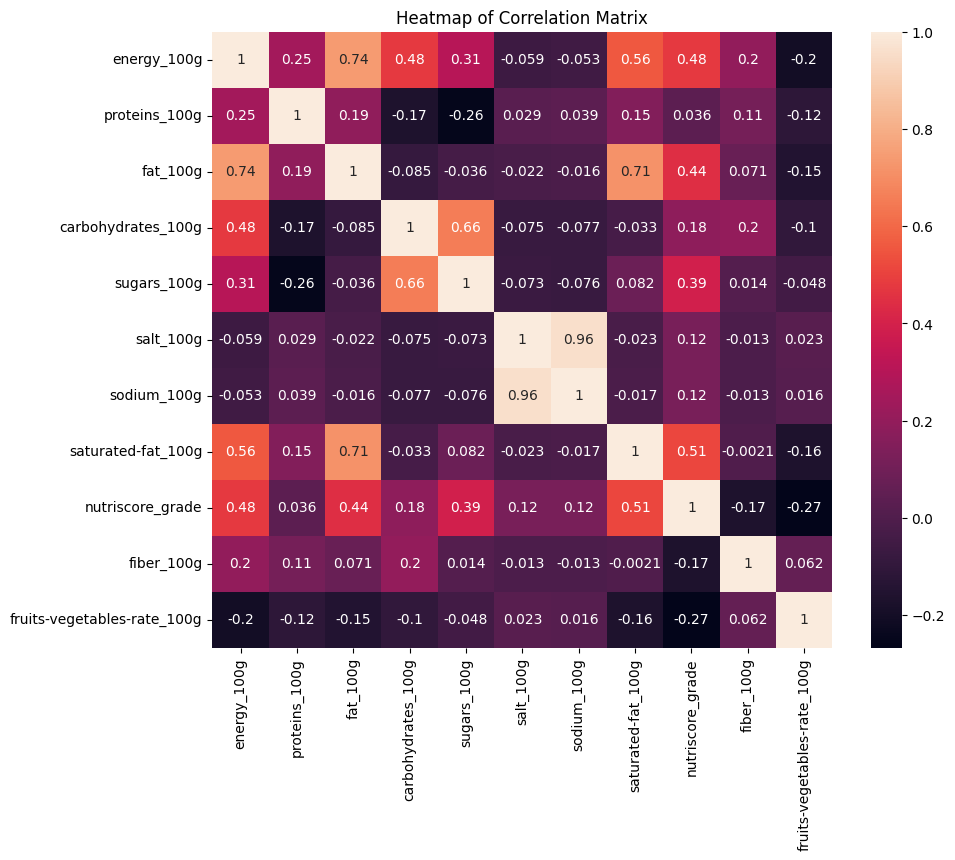

In [15]:
mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
df_ad['nutriscore_grade'] = df_ad['nutriscore_grade'].map(mapping)

correlation_matrix = df_ad.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

mapping = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}
df_ad['nutriscore_grade'] = df_ad['nutriscore_grade'].map(mapping)

In [10]:
print(df_clean.head())
print(df_clean.info())

   energy_100g  proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  \
0       1717.0            3.0      10.9                73.5         49.3   
1       1898.0            8.5      15.5                68.0          2.0   
2       1615.0            6.9       3.2                80.4         51.8   
3       1487.0            3.8       2.0                78.0         58.0   
4       2040.0            7.0      25.0                56.0         33.0   

   salt_100g nutriscore_grade  
0     1.7000                e  
1     1.7526                c  
2     0.0900                d  
3     0.0900                d  
4     0.3810                e  
<class 'pandas.core.frame.DataFrame'>
Index: 522952 entries, 0 to 1078834
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   energy_100g         522952 non-null  float64
 1   proteins_100g       522952 non-null  float64
 2   fat_100g            522952 non-null  flo

In [11]:
df_clean['nutriscore_grade'] = df_clean.nutriscore_grade.astype('category')
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 522952 entries, 0 to 1078834
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   energy_100g         522952 non-null  float64 
 1   proteins_100g       522952 non-null  float64 
 2   fat_100g            522952 non-null  float64 
 3   carbohydrates_100g  522952 non-null  float64 
 4   sugars_100g         522952 non-null  float64 
 5   salt_100g           522952 non-null  float64 
 6   nutriscore_grade    522952 non-null  category
dtypes: category(1), float64(6)
memory usage: 28.4 MB
None


C:\Users\ANANDITO\AppData\Local\Temp\ipykernel_16336\3860308322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['nutriscore_grade'] = df_clean.nutriscore_grade.astype('category')


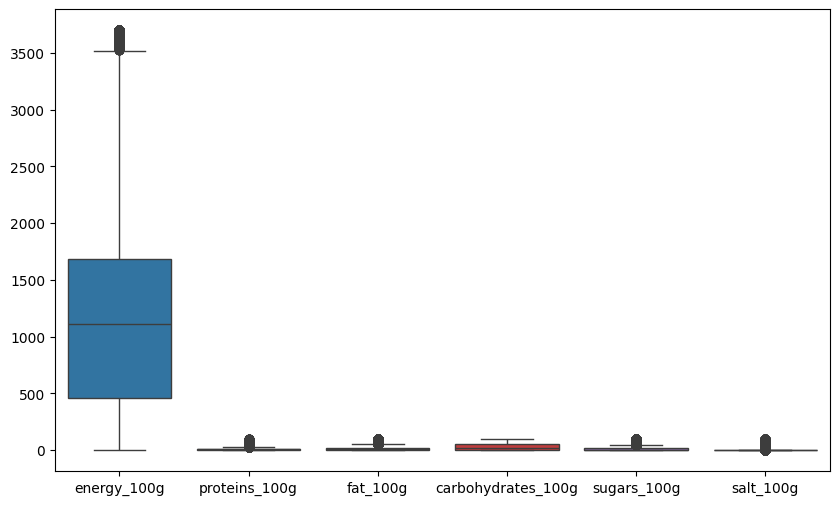

In [12]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_clean) 
plt.show()

In [13]:
le = LabelEncoder()
df_clean["nutriscore_grade"] = le.fit_transform(df_clean["nutriscore_grade"])

C:\Users\ANANDITO\AppData\Local\Temp\ipykernel_16336\3461501102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["nutriscore_grade"] = le.fit_transform(df_clean["nutriscore_grade"])


In [14]:
kol = ["proteins_100g", "fat_100g", "sugars_100g", "salt_100g", "carbohydrates_100g", "energy_100g"]

In [15]:
def remove_outlier(df, kolom):
    Q1 = df_clean[kolom].quantile(0.25)
    Q3 = df_clean[kolom].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    return df[(df[kolom] < upper) & (df[kolom] > lower)]

In [ ]:
def replace_outliers_with_median_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    mean_value = df[column].mean()

    if column == "energy_100g":
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    else:
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    
    return df

In [16]:
for k in kol:
  #df_clean = remove_outlier(df_clean, k)
  #df_clean = replace_outliers_with_median_mean(df_clean, k)

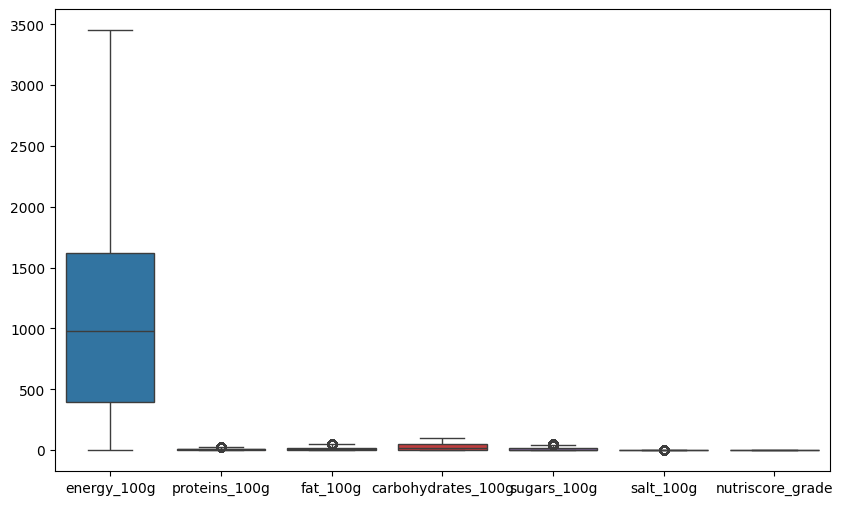

In [17]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_clean) 
plt.show()

In [18]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 437786 entries, 0 to 1078834
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   energy_100g         437786 non-null  float64
 1   proteins_100g       437786 non-null  float64
 2   fat_100g            437786 non-null  float64
 3   carbohydrates_100g  437786 non-null  float64
 4   sugars_100g         437786 non-null  float64
 5   salt_100g           437786 non-null  float64
 6   nutriscore_grade    437786 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 25.1 MB
None


In [19]:
x = df_clean.drop(columns=['nutriscore_grade'])
y = pd.Categorical(df_clean['nutriscore_grade']).codes

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  
    patience=7, 
    restore_best_weights=True 
)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.ReLU(max_value=6)), 
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.ReLU(max_value=6)), 
    tf.keras.layers.Dense(len(le.classes_), activation='softmax') 
])

c:\Users\ANANDITO\.conda\envs\fp-modsim\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer=tf.keras.optimizers.Nadam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5473 - loss: 1.0597 - val_accuracy: 0.6550 - val_loss: 0.8329
Epoch 2/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6569 - loss: 0.8318 - val_accuracy: 0.6782 - val_loss: 0.7898
Epoch 3/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6737 - loss: 0.8025 - val_accuracy: 0.6839 - val_loss: 0.7740
Epoch 4/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6813 - loss: 0.7833 - val_accuracy: 0.6839 - val_loss: 0.7649
Epoch 5/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6858 - loss: 0.7724 - val_accuracy: 0.6911 - val_loss: 0.7524
Epoch 6/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6888 - loss: 0.7647 - val_accuracy: 0.6938 - val_loss: 0.7452
Epoch 7/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6888 - loss: 0.7609 - val_accuracy: 0.6942 - val_loss: 0.7390
Epoch 8/100
10945/10945 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - ac